# **Data Summary**

the data is consiste of 1000 data points with 8 diffrent features:


*   gender: male/Female
*   Race/Ethnicity: A - B - C - D - E
*   Parents' education :
1. master's degree
2. bachelor's degree
3. associate's degree   
4. some college
5. high school
6. some high school

*  lunch: free/reduced and standard 
*  test preparation course: none and completed








# ***Importing Libraries***


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
 

# **Data Visualization**

In [2]:
data = pd.read_csv("StudentsPerformance.csv")
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
data.shape

(1000, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:

for col in data:
  if data[col].dtype == "int64":
    continue
  print( col +": ")
  print( data[col].unique() )
  print()

gender: 
['female' 'male']

race/ethnicity: 
['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education: 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch: 
['standard' 'free/reduced']

test preparation course: 
['none' 'completed']



**Histograms**

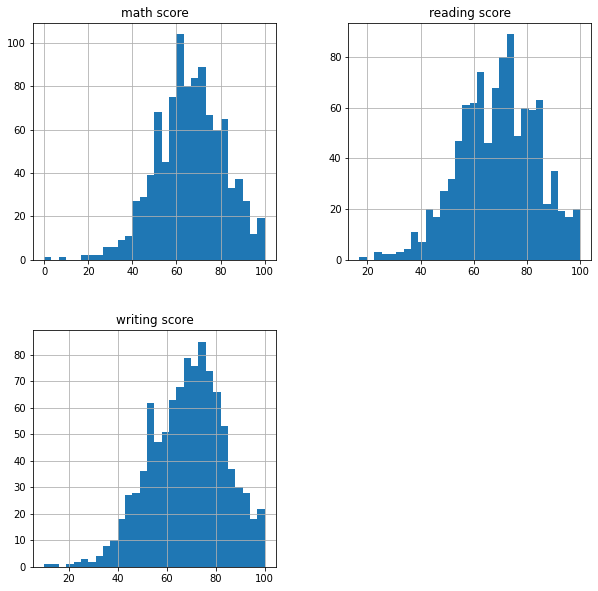

In [8]:
data.hist(bins = 30, figsize=(10,10))
plt.show()

# **Features Transformations**

In [9]:
from sklearn.preprocessing import OrdinalEncoder
o = OrdinalEncoder()
PLE = o.fit_transform(data[['parental level of education']])
PLE = pd.DataFrame(PLE , columns=["Parental Level of Education"])
data['english score'] = data[['reading score', 'writing score']].mean(axis=1)
x = pd.concat([PLE,data['english score'], data['math score']],   axis =1,   )
x.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Parental Level of Education,1.0,4.0,3.0,0.0,4.0,0.0,4.0,4.0,2.0,2.0,0.0,0.0,2.0,4.0,3.0,5.0,2.0,5.0,3.0,0.0
english score,73.0,89.0,94.0,50.5,76.5,80.5,93.5,41.0,65.5,55.0,53.0,47.5,77.0,71.0,55.5,76.5,87.5,30.0,44.0,59.5
math score,72.0,69.0,90.0,47.0,76.0,71.0,88.0,40.0,64.0,38.0,58.0,40.0,65.0,78.0,50.0,69.0,88.0,18.0,46.0,54.0


In [10]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
x_scaled = MM.fit_transform(x)

# **Clustering using KMeans**

 **Finding the Number of Cluster Via Elbow Method**

In [11]:
from sklearn.cluster import KMeans

def elbow(x):
    k = range(1,11)

    inertia = []
    for i in k:
      kmean = KMeans(n_clusters = i  , init="k-means++", random_state=42 )
      kmean.fit(x)
      inertia.append( kmean.inertia_)

    plt.plot(k,inertia)
    plt.title("Elbow Method")
    plt.xlabel("Num of Clusters")
    plt.ylabel("Inertia")
    plt.grid()







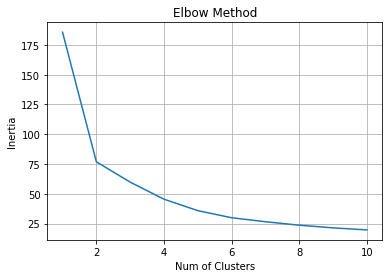

In [12]:
elbow(x_scaled)

**KMean**

In [13]:
K = [2,3,4,5,6]
y_Kmeans =[]
for i in K:
  kmeans = KMeans(n_clusters = i, init="k-means++", random_state=42 )
  y_kmeans=y_Kmeans.append(kmeans.fit_predict(x_scaled))

# **Visualising Kmeans**

In [14]:
y_kmeans= y_Kmeans[1]
Y = pd.DataFrame(y_kmeans , columns=['Clusters from KMeans'])
X= pd.DataFrame(x_scaled , columns=x.columns)
dataX = pd.concat([X,Y], axis=1)
dataX

,Parental Level of Education,english score,math score,Clusters from KMeans
0,0.2,0.687861,0.72,1
1,0.8,0.872832,0.69,0
2,0.6,0.930636,0.90,0
3,0.0,0.427746,0.47,1
4,0.8,0.728324,0.76,0
...,...,...,...,...
995,0.6,0.965318,0.88,0
996,0.4,0.479769,0.62,2
997,0.4,0.630058,0.59,2
998,0.8,0.739884,0.68,0


In [15]:
y_kmeans

array([1, 0, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0,
       0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 0, 1,
       0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 0,
       1, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2,
       0, 0, 2, 0, 1, 1, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 2, 0,
       2, 1, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0,
       2, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1,
       2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 1,
       2, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 2, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0,

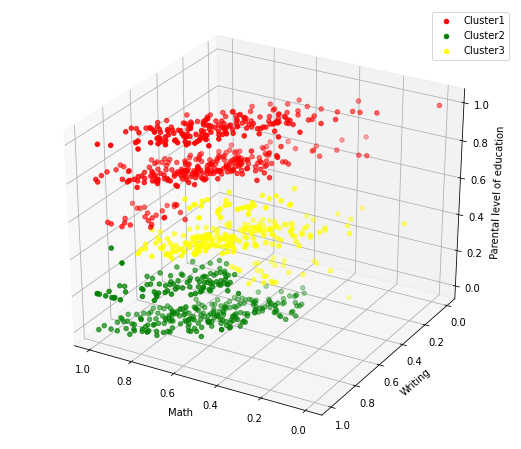

In [16]:
fig = plt.figure(figsize=(20,8))

ax = fig.add_subplot(1,2,1, projection='3d')

ax.scatter(dataX.loc[y_kmeans==0,'math score'], dataX.loc[y_kmeans==0, 'english score'],dataX.loc[y_kmeans==0,'Parental Level of Education'], c='red' , label='Cluster1')
ax.scatter(dataX.loc[y_kmeans==1,'math score'], dataX.loc[y_kmeans==1, 'english score'],dataX.loc[y_kmeans==1,'Parental Level of Education'], c='green' , label='Cluster2')
ax.scatter(dataX.loc[y_kmeans==2,'math score'], dataX.loc[y_kmeans==2, 'english score'],dataX.loc[y_kmeans==2,'Parental Level of Education'], c='yellow' , label='Cluster3')

ax.set_xlabel('Math')
ax.set_ylabel('Writing')
ax.set_zlabel('Parental level of education')
ax.view_init(30,120)
ax.legend()


# **Clustering Using DBScan With Elbow Method**

**Finding the best Epsilon and best number of samples**

In [17]:
from sklearn.neighbors import NearestNeighbors

dataX1 = dataX.iloc[::, 0:3]
b = dataX1.shape[1]
n_clu = b*2

neib = NearestNeighbors(n_neighbors=n_clu).fit(dataX1)
distance , indecies = neib.kneighbors(dataX1)
print(distance)
print(distance.shape)

[[0.         0.02519124 0.02647096 0.0305518  0.03514698 0.03609497]
 [0.         0.01155043 0.05573513 0.05775214 0.06659812 0.06810576]
 [0.         0.04003557 0.06432113 0.07218994 0.07511925 0.07557372]
 ...
 [0.         0.01156069 0.0152856  0.0152856  0.02       0.02312139]
 [0.         0.01155043 0.01155043 0.01155043 0.02081856 0.02310086]
 [0.         0.01155043 0.02081856 0.02647096 0.02647096 0.0305518 ]]
(1000, 6)


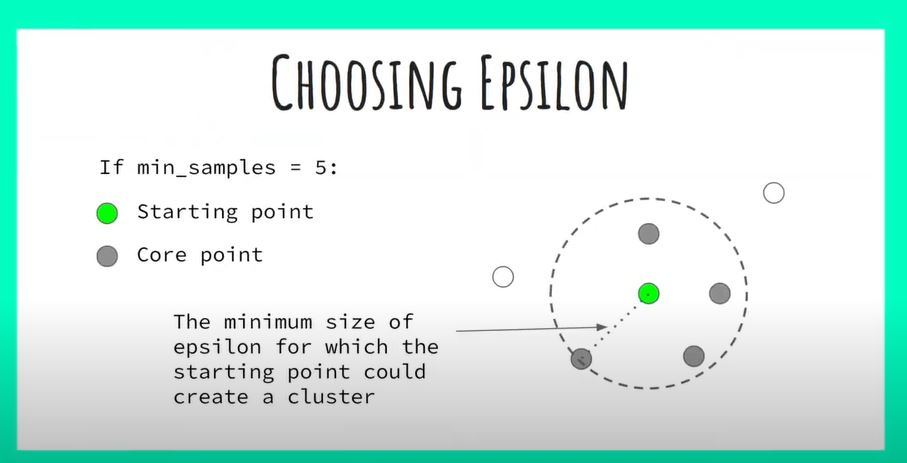

In [18]:
dataX1["Farthest distance"] = distance[:,-1]
dataX1.head()

,Parental Level of Education,english score,math score,Farthest distance
0,0.2,0.687861,0.72,0.036095
1,0.8,0.872832,0.69,0.068106
2,0.6,0.930636,0.90,0.075574
3,0.0,0.427746,0.47,0.045135
4,0.8,0.728324,0.76,0.028902


In [19]:
X_DBSCAN = dataX1.sort_values('Farthest distance' , ascending=False).reset_index()
X_DBSCAN.head(5)

,index,Parental Level of Education,english score,math score,Farthest distance
0,59,1.0,0.000000,0.00,0.354849
1,980,0.4,0.115607,0.08,0.284792
2,596,0.4,0.069364,0.30,0.230271
3,466,0.0,0.242775,0.26,0.218403
4,327,0.8,0.086705,0.28,0.203968


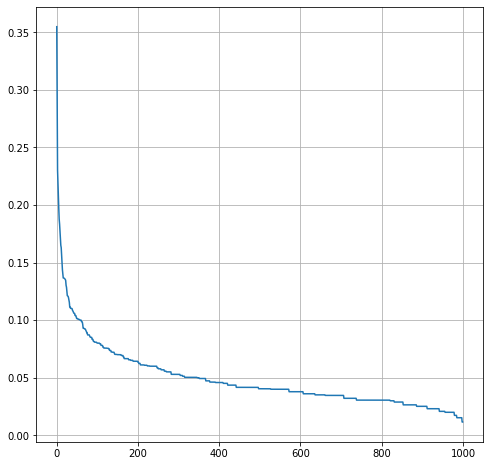

In [20]:
fig = plt.figure(figsize=(8,8))
plt.plot(X_DBSCAN["Farthest distance"])
plt.grid()



*Another Way to plot*

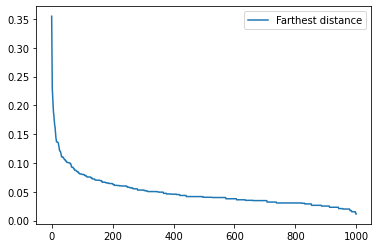

In [21]:

dataX1.sort_values('Farthest distance' , ascending=False).reset_index()[["Farthest distance"]].plot()

In [22]:
from sklearn.cluster import DBSCAN
DBS = DBSCAN(eps=0.075, min_samples=n_clu ) 
dataX1["Clusters from DBSCAN"] = DBS.fit_predict(X_DBSCAN.iloc[::, 1:5])


In [23]:
dataX1.head()

,Parental Level of Education,english score,math score,Farthest distance,Clusters from DBSCAN
0,0.2,0.687861,0.72,0.036095,-1
1,0.8,0.872832,0.69,0.068106,-1
2,0.6,0.930636,0.90,0.075574,-1
3,0.0,0.427746,0.47,0.045135,-1
4,0.8,0.728324,0.76,0.028902,-1


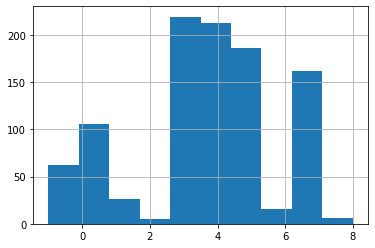

In [24]:
dataX1["Clusters from DBSCAN"].hist()

In [30]:
y_DBSCAN = dataX1['Clusters from DBSCAN']
y_DBSCAN

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
995    5
996    3
997    5
998    3
999    3
Name: Clusters from DBSCAN, Length: 1000, dtype: int64

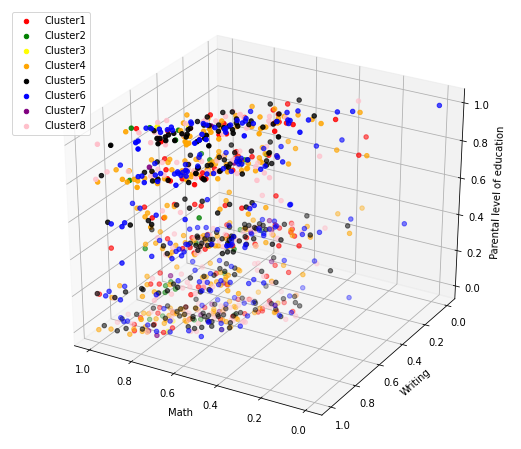

In [34]:
fig = plt.figure(figsize=(20,8))

ax = fig.add_subplot(1,2,1, projection='3d')

ax.scatter(dataX1.loc[y_DBSCAN==0,'math score'], dataX1.loc[y_DBSCAN==0, 'english score'],dataX1.loc[y_DBSCAN==0,'Parental Level of Education'], c='red' , label='Cluster1')
ax.scatter(dataX1.loc[y_DBSCAN==1,'math score'], dataX1.loc[y_DBSCAN==1, 'english score'],dataX1.loc[y_DBSCAN==1,'Parental Level of Education'], c='green' , label='Cluster2')
ax.scatter(dataX1.loc[y_DBSCAN==2,'math score'], dataX1.loc[y_DBSCAN==2, 'english score'],dataX1.loc[y_DBSCAN==2,'Parental Level of Education'], c='yellow' , label='Cluster3')
ax.scatter(dataX1.loc[y_DBSCAN==3,'math score'], dataX1.loc[y_DBSCAN==3, 'english score'],dataX1.loc[y_DBSCAN==3,'Parental Level of Education'], c='orange' , label='Cluster4')
ax.scatter(dataX1.loc[y_DBSCAN==4,'math score'], dataX1.loc[y_DBSCAN==4, 'english score'],dataX1.loc[y_DBSCAN==4,'Parental Level of Education'], c='black' , label='Cluster5')
ax.scatter(dataX1.loc[y_DBSCAN==5,'math score'], dataX1.loc[y_DBSCAN==5, 'english score'],dataX1.loc[y_DBSCAN==5,'Parental Level of Education'], c='blue' , label='Cluster6')
ax.scatter(dataX1.loc[y_DBSCAN==6,'math score'], dataX1.loc[y_DBSCAN==6, 'english score'],dataX1.loc[y_DBSCAN==6,'Parental Level of Education'], c='purple' , label='Cluster7')
ax.scatter(dataX1.loc[y_DBSCAN==7,'math score'], dataX1.loc[y_DBSCAN==7, 'english score'],dataX1.loc[y_DBSCAN==7,'Parental Level of Education'], c='pink' , label='Cluster8')

ax.set_xlabel('Math')
ax.set_ylabel('Writing')
ax.set_zlabel('Parental level of education')
ax.view_init(30,120)
ax.legend()


**Result of DBSCAN**

The Result of the DSCAN Clustering is: 8 diffrent clusters and -1 represent the outliers

# **Mean Shift Clustering**

In [25]:
dataX2 = dataX.drop(["Clusters from KMeans"], axis=1)
dataX2.head()

,Parental Level of Education,english score,math score
0,0.2,0.687861,0.72
1,0.8,0.872832,0.69
2,0.6,0.930636,0.90
3,0.0,0.427746,0.47
4,0.8,0.728324,0.76


**Taking the bandwidth of the MeanShift algorithm as the farthest distance of the neigbhores**

In [26]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=0.3)
ms.fit(dataX2)
l = ms.labels_
centers = ms.cluster_centers_

In [27]:
print(l)

[0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1
 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0
 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0
 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1
 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0
 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0
 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0
 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1
 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0
 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 1 0 1 0 0 0 1 

In [28]:
l = pd.DataFrame(l, columns=['Clusters from MeanShift'])
dataX22= pd.concat([dataX2,l], axis=1)
dataX22.head()

,Parental Level of Education,english score,math score,Clusters from MeanShift
0,0.2,0.687861,0.72,0
1,0.8,0.872832,0.69,1
2,0.6,0.930636,0.90,1
3,0.0,0.427746,0.47,0
4,0.8,0.728324,0.76,1


# **Discussion**

AS a Result we got 2 diffrents clusters only on this bandwidth. In contrast using DBSCAN we have got 8 diffrent clusters with the same farthest distance (~0.3) between the neigbhores. moreover the KMean Clustering with the help of the elbow method we have got 3 diffrents clusters.

**Futur Work**

in order to compare and validate each algorithm, there is no direct method using metrics to identify which method is better. we need to use the Silhouette Validation technique!













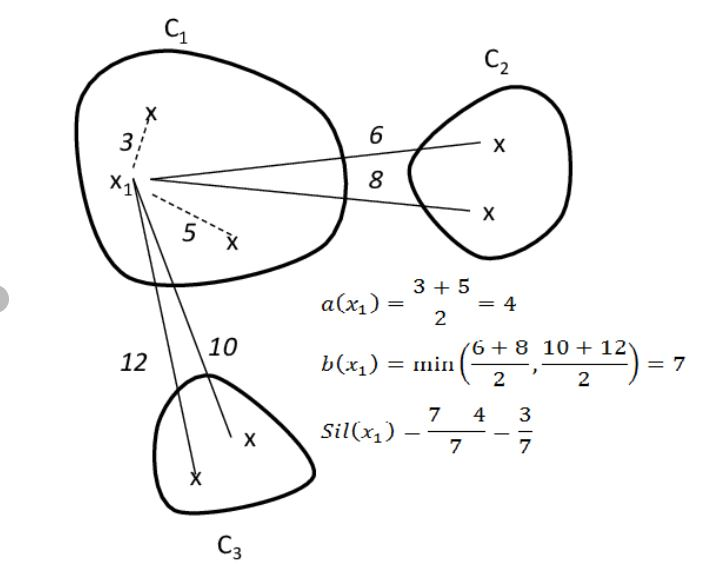